## import section

Here we import all necessary modules required

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data set 

In this section we read the data set 

Here our data set is excel file so we read the file 

using pd.read_excel() function and we can import csv as using read_csv() 

In [21]:
df=pd.read_excel(r"D:\datasets\flight_fare_prediction Data Set\Data_Train.xlsx")

In [22]:
df.head(5)#This will show us top 5 columns,since the argument passed is 5.If we want 10 rows we pass 10 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [23]:
df.shape#This will help us to see the number of rows and columns

(10683, 11)

In [24]:
df.columns#this will display all the columns in the dataframe

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [25]:
df.info()#from this we can see the info about each columns including data type and number of non null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [26]:
df.isnull().sum()#we can also see the number of null values in each column by using this

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [27]:
df.dropna(inplace = True)#this will drop all the null valued rows in the data frame

# Data preprocessing

In this we now try to understand what each column is all about and the insights we get       
from each column and based on insights we can decide how to encode and preprocess the data



1)The first column is airline columnn which contains name of the airlines,So we can perform the lablel encoding      
                           to convert it into numeric features.since the model can only understand numeric data     


In [32]:
print(df.Airline[:5])#This will show us the types of airlines and their counts

df.Airline

0         IndiGo
1      Air India
2    Jet Airways
3         IndiGo
4         IndiGo
Name: Airline, dtype: object


AttributeError: 'Series' object has no attribute 'counts'

In [15]:
from sklearn.preprocessing import LabelEncoder
df['Airline']=LabelEncoder().fit_transform(df.Airline)#label encoding Airline column

In [16]:
df.Airline[:5]#after label encoding
set(df.Airline)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

2)The Date_of_journey column has the date of journey for each flight in each column when we observe it all the dates      
are from  year 2019,So the main insight from it is month and day of journey.So we can create two new columns for      
month and date in preprocessing step

In [12]:
df.Date_of_Journey[:5]#dates before preprocessing

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

******************************************************************************************

creating new column by considering .Date_of_Journey to do that we have pd.to_datatime is used which is used to convert    

the given data which is time in string format to the date time. the parameter format specifies the format of data time we want 

%d specifies day

%m specifies month

%Y specifies year

Note we can chance the case of letters to obtain different styles shown bellow

In [13]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day#dt.day gives the day from tbe date time

In [14]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month#dt.month gives the month from the date time

In [15]:
pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y")[:5]

0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]

In [16]:
df=df.drop('Date_of_Journey',axis=1)#deleting date of journey column

In [17]:
df.head(5)#here we can see the chages we have made to data set

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,3,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,3,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,3,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


***********************************************************************************************************************

3)The Source column conveys from where the flight is going,there are different sources as we can see
  now label encode them 

In [18]:
df.Source[:5]#before

0    Banglore
1     Kolkata
2       Delhi
3     Kolkata
4    Banglore
Name: Source, dtype: object

In [19]:
a=df.groupby('Source')#used to groupby the entire data by the different type of sources

In [20]:
a.describe()#will  describe all numeric feartures according to Source cities

Airline                                               Journey_day  \
           count      mean       std  min  25%  50%  75%   max       count   
Source                                                                       
Banglore  2197.0  3.904870  2.608756  0.0  3.0  4.0  4.0  11.0      2197.0   
Chennai    381.0  5.359580  2.969023  1.0  3.0  3.0  8.0  11.0       381.0   
Delhi     4536.0  3.919753  1.929793  0.0  3.0  4.0  6.0  10.0      4536.0   
Kolkata   2871.0  3.884013  2.566358  0.0  3.0  4.0  4.0  10.0      2871.0   
Mumbai     697.0  4.038737  2.463514  1.0  3.0  4.0  4.0  10.0       697.0   

                      ...    Journey_month        Price                \
               mean   ...              75%  max   count          mean   
Source                ...                                               
Banglore  12.668639   ...              5.0  6.0  2197.0   8017.464269   
Chennai   13.800525   ...              6.0  6.0   381.0   4789.892388   
Delhi     14.496914   ...              6.0  6.0  4536.0  10540.113536   
Kolkata   12.662139   ...              5.0  6.0  2871.0   9158.389411   
Mumbai    13.058824   ...              6.0  6.0   697.0   5059.708752   

                                                                  
                  std     min     25%      50%      75%      max  
Source                                                            
Banglore  5964.303079  3257.0  4544.0   6121.0   8714.0  79512.0  
Chennai   2190.219021  3145.0  3597.0   3850.0   5277.0  19630.0  
Delhi     3782.092549  3876.0  7202.0  10262.0  13344.0  52285.0  
Kolkata   3741.997070  3480.0  5192.0   9345.0  12681.0  31945.0  
Mumbai    4100.504092  1759.0  2647.0   3342.0   5678.0  25139.0  

[5 rows x 32 columns]

In [21]:
df['Source']=LabelEncoder().fit_transform(df.Source)#label encoding source column

In [22]:
df.head(5)#WE can see source column is encoded

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,3,0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,1,3,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,4,2,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,3,3,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,3,0,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


From above we got the coclusion that chennai and mumbai has low mean prices     
from the above we can also draw many conclusions as per your domain requirement

4)The Destination column conveys where the flight has to reach,there are different destination as we can see now label encode them

In [23]:
df.Destination[:5]#before

0    New Delhi
1     Banglore
2       Cochin
3     Banglore
4    New Delhi
Name: Destination, dtype: object

In [24]:
a=df.groupby('Destination')#used to groupby the entire data by the different type of Destination

In [25]:
a.describe()

Airline                                               Journey_day  \
              count      mean       std  min  25%  50%  75%   max       count   
Destination                                                                     
Banglore     2871.0  3.884013  2.566358  0.0  3.0  4.0  4.0  10.0      2871.0   
Cochin       4536.0  3.919753  1.929793  0.0  3.0  4.0  6.0  10.0      4536.0   
Delhi        1265.0  4.152569  2.782398  0.0  3.0  4.0  4.0  11.0      1265.0   
Hyderabad     697.0  4.038737  2.463514  1.0  3.0  4.0  4.0  10.0       697.0   
Kolkata       381.0  5.359580  2.969023  1.0  3.0  3.0  8.0  11.0       381.0   
New Delhi     932.0  3.568670  2.312021  0.0  2.0  4.0  4.0  11.0       932.0   

                       ...     Price           Source                      \
                  mean ...       75%      max   count mean  std  min  25%   
Destination            ...                                                  
Banglore     12.662139 ...   12681.0  31945.0  2871.0  3.0  0.0  3.0  3.0   
Cochin       14.496914 ...   13344.0  52285.0  4536.0  2.0  0.0  2.0  2.0   
Delhi        13.569960 ...    5911.0   8541.0  1265.0  0.0  0.0  0.0  0.0   
Hyderabad    13.058824 ...    5678.0  25139.0   697.0  4.0  0.0  4.0  4.0   
Kolkata      13.800525 ...    5277.0  19630.0   381.0  1.0  0.0  1.0  1.0   
New Delhi    11.445279 ...   13817.0  79512.0   932.0  0.0  0.0  0.0  0.0   

                            
             50%  75%  max  
Destination                 
Banglore     3.0  3.0  3.0  
Cochin       2.0  2.0  2.0  
Delhi        0.0  0.0  0.0  
Hyderabad    4.0  4.0  4.0  
Kolkata      1.0  1.0  1.0  
New Delhi    0.0  0.0  0.0  

[6 rows x 40 columns]

In [26]:
df['Destination']=LabelEncoder().fit_transform(df.Destination)#label encoding Destination column

In [27]:
df.Destination[:5]

0    5
1    0
2    1
3    0
4    5
Name: Destination, dtype: int64

************************************************************************************************************

5)The Route column is unimportant since the route column conveys how many stops, same info is conved by Total_Stops         
   so we will delete the route column 

In [28]:
df.Route.value_counts()[:5]

DEL → BOM → COK    2376
BLR → DEL          1552
CCU → BOM → BLR     979
CCU → BLR           724
BOM → HYD           621
Name: Route, dtype: int64

In [29]:
df=df.drop("Route",axis=1)#droped Route column

In [30]:
df.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,3,0,5,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,1,3,0,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,4,2,1,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,3,3,0,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,3,0,5,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


***********************************************************************************************

6)The Dep_Time column conveys the time of departure.Since we have the string which conveys hours and minutes we hate to devide hours and minutes so that it will turn into numeric data 

In [31]:
df.Dep_Time[:5]

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

In [32]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [33]:
df.head(5)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,3,0,5,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,1,3,0,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,4,2,1,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,3,3,0,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,3,0,5,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


************************************************************************************************************

7)The Arrival_Time column conveys the time of Arrival.Since we have the string which conveys hours and     
   minutes we hate to devide hours and minutes so that it will turn into numeric data     
   Since we have month also in some rows we can skip them ,though same info is coveyed by Date_of_journey

In [34]:
df.Arrival_Time[:5]

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [35]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [36]:
df.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,1,3,0,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,4,2,1,19h,2 stops,No info,13882,9,6,9,25,4,25
3,3,3,0,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,3,0,5,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


8) The duration columns specifies the total duration for journey 

   but here duration colums contains rows which has both hours and minutes,for few rows only hours,for some rows  
   
   only minutes.So first we have to modify that every row has both hours and minutes then we have to seperate both
    
   hours and minutes into two new columns to get numerical data

In [37]:
df.Duration[:5]

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [38]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [39]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [40]:
df.drop(["Duration"], axis = 1, inplace = True)#we have deleted Duration column

In [41]:
df.head(5)#after change

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,1,3,0,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,4,2,1,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,3,3,0,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,3,0,5,1 stop,No info,13302,1,3,16,50,21,35,4,45


9)In Additional_Info contains more number of  'No info' values which is useless

In [42]:
df.Additional_Info

0                             No info
1                             No info
2                             No info
3                             No info
4                             No info
5                             No info
6         In-flight meal not included
7                             No info
8         In-flight meal not included
9                             No info
10                            No info
11                            No info
12                            No info
13        In-flight meal not included
14                            No info
15                            No info
16                            No info
17        In-flight meal not included
18                            No info
19        In-flight meal not included
20                            No info
21                            No info
22                            No info
23                            No info
24        In-flight meal not included
25                            No info
26          

In [43]:
df.drop(["Additional_Info"], axis = 1, inplace = True)#we have deleted Additional_info column

In [44]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,non-stop,3897,24,3,22,20,1,10,2,50
1,1,3,0,2 stops,7662,1,5,5,50,13,15,7,25
2,4,2,1,2 stops,13882,9,6,9,25,4,25,19,0
3,3,3,0,1 stop,6218,12,5,18,5,23,30,5,25
4,3,0,5,1 stop,13302,1,3,16,50,21,35,4,45


 10)The total_stops indicates the number of stops the stops the flight take before reaching destination  

In [45]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [46]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45


## Test data Set Preprocessing

Since now we have seen the preprocessing of  Train Data set, now lets preprocessing of the test data set

In [47]:
df_test=pd.read_excel(r'D:\datasets\flight_fare_prediction Data Set\test.xlsx')

In [48]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
df_test['Airline']=LabelEncoder().fit_transform(df_test.Airline)#label encoding Airline column
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day#dt.day gives the day from tbe date time
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month#dt.month gives the month from the date
df_test=df_test.drop('Date_of_Journey',axis=1)#deleting date of journey columntime
df_test['Source']=LabelEncoder().fit_transform(df_test.Source)#label encoding source column
df_test['Destination']=LabelEncoder().fit_transform(df_test.Destination)#label encoding Destination column
df_test=df_test.drop("Route",axis=1)#droped Route column
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour

# Extracting Minutes

df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use

df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour

# Extracting Minutes
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)#we have deleted Duration column
df_test.drop(["Additional_Info"], axis = 1, inplace = True)#we have deleted Additional_info column
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [50]:
df_test.head(5)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,12,5,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,6,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


## Feature Selection 

Corelation can used for feature selection

In [51]:
df.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.013397,0.018446,-0.199396,-0.039565,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092,-0.158136,-0.028009
Source,-0.013397,1.000000,-0.592576,0.192840,0.015999,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040,0.166121,-0.145193
Destination,0.018446,-0.592576,1.000000,-0.295476,-0.071122,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196,-0.258446,0.061235
Total_Stops,-0.199396,0.192840,-0.295476,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Price,-0.039565,0.015999,-0.071122,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Journey_day,0.026137,0.004902,-0.041025,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Journey_month,0.024674,0.183268,-0.364682,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,-0.035269,0.059047,-0.072997,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.059922,-0.056998,0.127931,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,-0.007567,0.025635,-0.039729,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309


The correlation matrix explains how a feature is correlated with other feature      
That is if a feature 'x' is correlated with y which means for a unit change in 'x' there will be some change in 'y'   
That is 'x' and 'y' are may be correlated in two ways       
1)positively    
2)Negetively        
Positively correlated means if 'x' increases then 'y' also increases     
Negitively correlated means if 'x' increases then 'y' also decreases    

The corelation value lies between -1 to 1           
if +1 they are highly postively correlated          
if -1 they are highly negatively correlated


To make it much more visually efficient to understand lets use some visualization tools

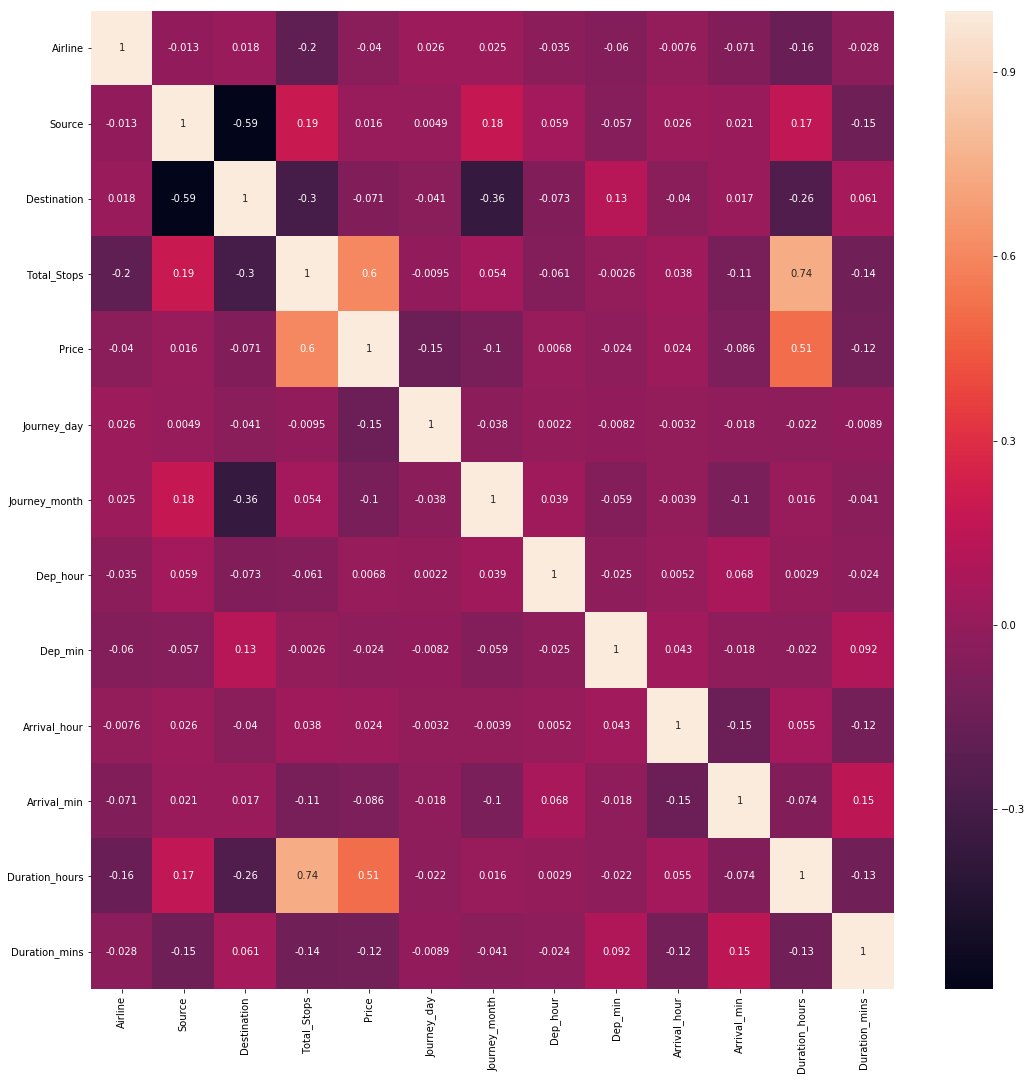

In [52]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot = True)
plt.show()

No two columns are much correlated     
To know whether two columns are highly correlated or not we define a margin that is 

If the magnitude correlation of two variables is more than 0.8 we say they are highly correlated

And if any two rows are highly correlated  we drop one of the column.Since they both conveys same insight approximately       
more than 80% of time..


NOTE:The margin is taken based on domine and requirement


To be more clear about features we now peform feature selection using ExtraTreesRegressor

Here we will pass our X and Y variable which we have created bellow to ExtraTreesRegressor algorithm  
And now the algorithm provides important features     
To get the features 

In [53]:
X=df.drop('Price',axis=1)#seperating train data set into 2 parts X contains all features except price

In [54]:
Y=df['Price']

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
selection.feature_importances_#this will throw us the importance of all feature between 0 and 1

array([0.16068641, 0.01483602, 0.0711899 , 0.25533508, 0.16211765,
       0.05831964, 0.02508727, 0.02672329, 0.0365442 , 0.02344705,
       0.14321859, 0.02249494])

In [57]:
#here we are creating a series object which contains columns of X as index

In [58]:
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)

To make it much understandable lets plot it

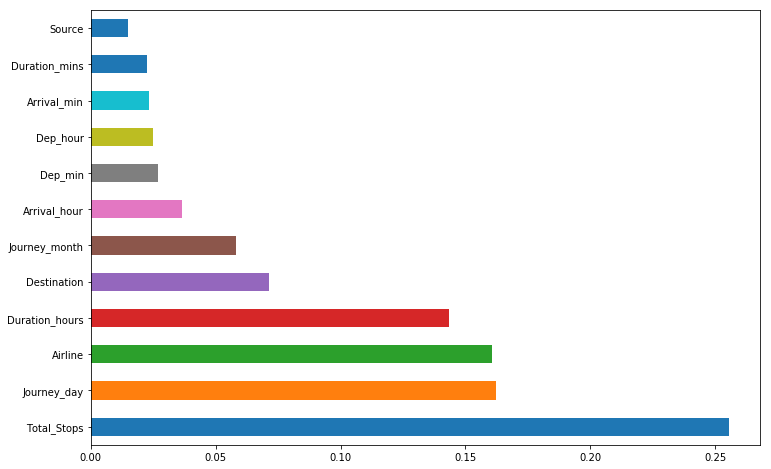

In [59]:
plt.figure(figsize = (12,8))
feat_importances.nlargest(20).plot(kind='barh')#we are plotting bargraph for important features(nlargest is used to order them)
plt.show()


## Train Test split Section

X contains all  the features and Y contains price column    

And the we have to split the X into 2 parts

1)x_train(by which we train model) 
2)y_train(by which we test the model)

And we have to split Y into

1)x_test(by which we test model for x_train)   
2)y_test(by which we test the model y_train)    

In [60]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state = 42)

## Fitting the model

## Applying random forest regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
# creating an object of RandomForestREgressor class
reg_rf = RandomForestRegressor()
# fitting the training data
reg_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
reg_rf.score(x_train, y_train)#Score for train data

0.9457739510500764

In [63]:
y_pred = reg_rf.predict(X_test)

In [64]:
reg_rf.score(X_test, y_test)#score from test data

0.7818732741142194

From above we have seen that we have acquired some good score..    
Note:the percentage for selecting good score depends on domain

## Now Lets try normal multiple linear regression

In [65]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
LR.score(x_train,y_train)#caluclating score for train(even it faled to predict for train data)

0.4359733167832308

In [67]:
LR.score(X_test,y_test)#caluclating score for test data

0.4381543229086622

You can observe some least score when we have applied normal linear regression    
from this we can understand RandomForest is too good since its works with multiple trees and produce     
accourate outputs.

linear regression works well only for the data which is linearly distributed

To improve the accurrecy from above random forest we can perform 

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [68]:
from sklearn.model_selection import RandomizedSearchCV#importing module

creating the required values

In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [71]:
# Create the random grid from above created variables

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [72]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [73]:
rf_random.fit(x_train,y_train)#fitting

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [74]:
rf_random.best_params_#this will shows us best parameters

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [87]:
y_prediction = rf_random.predict(X_test)#predictibg the model

## Model accurecy test 

In [93]:
from sklearn.metrics import r2_score
r2_score(y_prediction,y_test)#used to caluclate accurecy of model

0.7660734414889651

we can see that the diffrence between actual data and predicted data is in forming gaussian cure which means our data    
is accurate

C:\Users\91832\Anaconda3.6\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


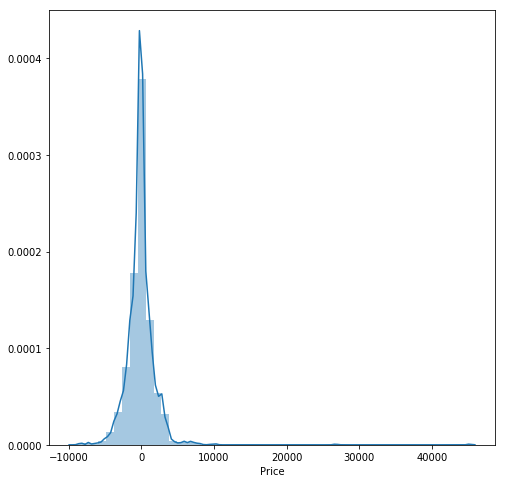

In [94]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_prediction)
plt.show()

Now we are plotting the actual data points and predicted data points.We can see they      
form a straight line so our prediction is pretty much accurate

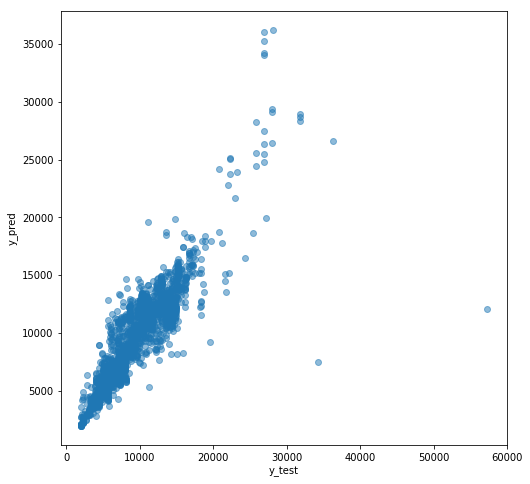

In [95]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()